# Analysis of Titanic dataset using Naive Bayes Classifier Algorithm

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h3>Preprocessing</h3>

In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<u>Replacing NAN values with median for Age attribute</u>

In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<u>Detecting and removing Outliers in the Data</u>

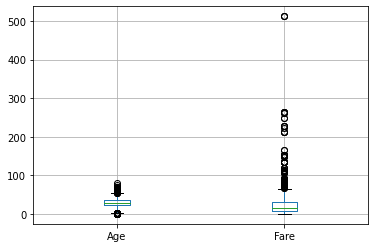

In [5]:
df[["Age","Fare"]].boxplot()
plt.show()

In [6]:
fare_median = df["Fare"].median()

In [7]:
# Replacing Fare outliers with their median
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
width = 1.5
lower_whisker = Q1 - (width*IQR)
upper_whisker = Q3 + (width*IQR)
df["Fare"] = df["Fare"].mask(df["Fare"] <lower_whisker, fare_median)
df["Fare"] = df["Fare"].mask(df["Fare"] >upper_whisker, fare_median)

# Replacing Age outliers with their mode
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df["Age"] = df["Age"].mask(df["Age"] <lower, df["Age"].median())
df["Age"] = df["Age"].mask(df["Age"] >upper, df["Age"].median())

In [8]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

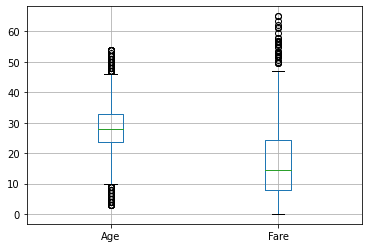

In [9]:
df[["Age","Fare"]].boxplot()

We can see that many outliers are reduced, we can futher reduce the outliers by narrowing the range.

<u>Dropping irrelevent Attributes</u>

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.drop(["PassengerId","Cabin","Ticket"],axis=1,inplace=True)

In [13]:
embark={'S':0,'Q':1,'C':2}
df['Sex'] = np.where(df['Sex'] == 'male', 1, 0)
df['Embarked'] = df['Embarked'].map(embark)

x = df.iloc[:,:-1]
x.drop(["Name","Survived"],axis=1,inplace=True)

spliting the data into train and test

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,df["Survived"],test_size=0.3)

<h3>Perform Bayes classification using pipeline and Use the scikit learn pipelines  to perform the preprocessing -standardizing, encoding and  model fitting in one step. .</h3>

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.svm import SVC

encode = OneHotEncoder().fit(x_train)
encode.transform(x_train).toarray()

pipe = Pipeline([('scaler', RobustScaler()), ('gnb', GaussianNB())])
pipe.fit(x_train,y_train)

y_pred = pipe.predict_proba(x_test)[:, 1]
pipe.score(x_test,y_test)

0.7910447761194029

<h3>Applying cross Validation</h3>

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
clf = KFold(n_splits=10, random_state=42, shuffle=True)

<h3>Tabulate using relevant measures of accuracy , Sensitivity and specificity.</h3>

In [25]:
accuracy = cross_val_score(pipe, x_train, y_train, cv=clf, scoring='accuracy')
precision = cross_val_score(pipe, x_train, y_train, cv=clf, scoring='precision')
recall = cross_val_score(pipe, x_train, y_train, cv=clf, scoring='recall')
print('Gaussian Naive Bayes Classifier')
print("Mean Accuracy: ",accuracy.mean())
print("Mean Sensitivity: ",recall.mean())
print("Mean precision: ",precision.mean())

Gaussian Naive Bayes Classifier
Mean Accuracy:  0.7721454173067077
Mean Sensitivity:  0.7471279252148817
Mean precision:  0.6730784795478899


<h3>Visualize the ROC curve and comment on performance</h3>

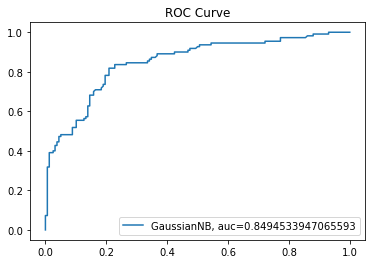

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))
plt.legend()
plt.title("ROC Curve")
plt.show()

We can see that the accuracy of this model is 0.79 which is a bit low we can use other Naive Bayes Classifiers such as BinomialNB or MultinomialNB to imrove the efficiency